In [9]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [11]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogLowNoise/


In [12]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "Diff01_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/SinLogLowNoise/Ridge_fSinLog_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_MSEs.parquet


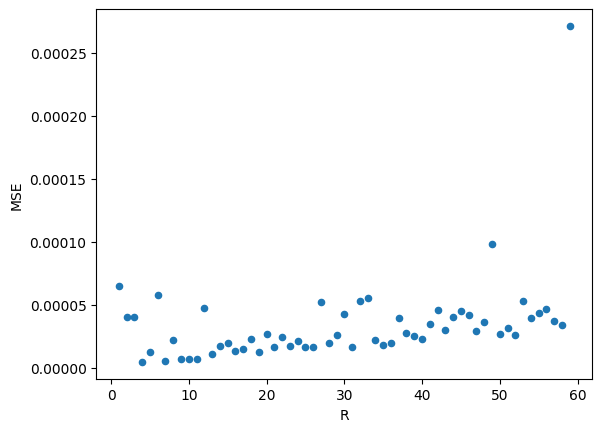

In [13]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [14]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.000065
2      0.000040
3      0.000040
4      0.000005
5      0.000012
6      0.000058
7      0.000006
8      0.000022
9      0.000007
10     0.000007
11     0.000007
12     0.000047
13     0.000011
14     0.000017
15     0.000019
16     0.000013
17     0.000015
18     0.000023
19     0.000012
20     0.000027
21     0.000016
22     0.000024
23     0.000017
24     0.000021
25     0.000016
26     0.000016
27     0.000052
28     0.000020
29     0.000026
30     0.000042
31     0.000017
32     0.000053
33     0.000055
34     0.000022
35     0.000018
36     0.000020
37     0.000039
38     0.000028
39     0.000025
40     0.000023
41     0.000035
42     0.000046
43     0.000030
44     0.000041
45     0.000045
46     0.000042
47     0.000029
48     0.000036
49     0.000098
50     0.000027
51     0.000032
52     0.000026
53     0.000053
54     0.000039
55     0.000043
56     0.000046
57     0.000037
58     0.000034
59     0.000271


0    0.000005
Name: 4,

In [15]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('LowNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

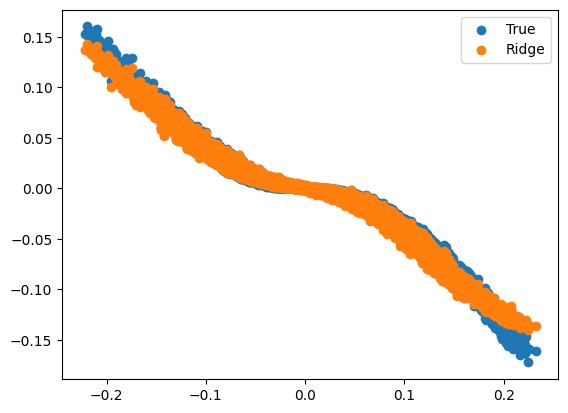

In [16]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()